Сгенерируем выборку $X_1, ..., X_{100}$ из стандартного нормального распределения. Построим и визуализирем точный доверительный интервал уровня доверия $γ = 0.95$ для

(a) a при известном $σ^2$,

(b) $\sigma^2$ при известном $a$,

(c) a при неизвестном $σ^2$,

(d) $\sigma^2$ при неизвестном a.

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns
%matplotlib inline

In [3]:
X = stats.norm.rvs(0,1,size=100)

In [12]:
def do_task(real_val, estimations, N=100):
    plt.figure(figsize=(14, 7))
    plt.axhline(real_val, color = 'g')
    pylab.ylim(real_val - 1, real_val + 1)
    lower, upper = estimations(X)
    plt.fill_between(range(1, N + 1), lower, upper)
    plt.show()

** а) Знаем $\sigma^2$ $\sqrt{n}(\bar{X} - a)$ ~ $N(0, 1)$, тогда $P(-z_{(1 + \gamma) / 2} < \sqrt{n}(\bar{X} - a) < z_{(1 + \gamma) / 2}) = \gamma$, отсюда выражаем оценку для a**

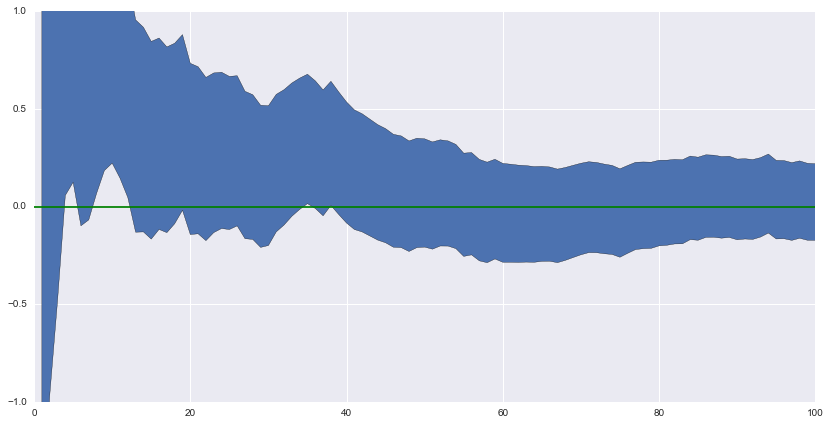

In [16]:
n = np.arange(1, len(X) + 1)
def estimations(X):
    return (np.cumsum(X) / n - stats.norm.ppf((1 + 0.95) / 2) / (np.sqrt(n)), 
           np.cumsum(X) / n + stats.norm.ppf((1 + 0.95) / 2) / (np.sqrt(n)))
do_task(0, estimations)

### б) Доверительный интервал для $\sigma^2$, если знаем $a$: $(\frac{(\sum (X_i - a)^2)}{\chi^2 _{(1 + \gamma)/2, n}}, \frac{(\sum (X_i - a)^2)}{\chi^2 _{(1 - \gamma)/2,n}})$.
https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB_%D0%B4%D0%BB%D1%8F_%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%B8_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8

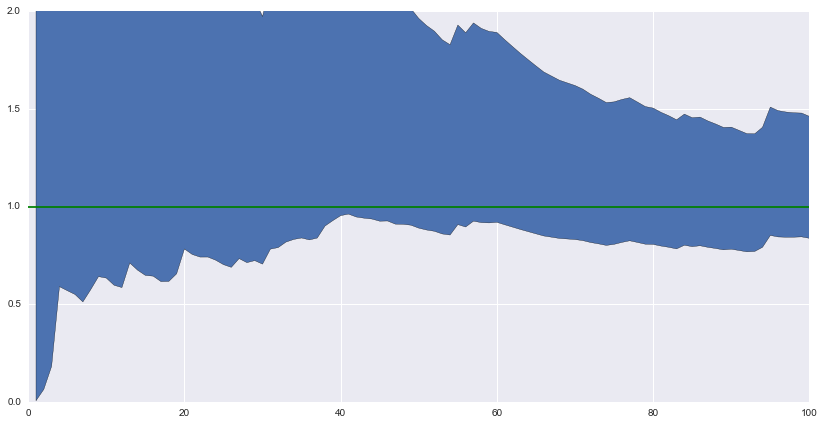

In [19]:
def estimations_b(X):
    return (np.cumsum(X ** 2) / np.vectorize(lambda i: stats.chi2.ppf((1 - 0.95) / 2, i))(n),
            np.cumsum(X ** 2) / np.vectorize(lambda i: stats.chi2.ppf((1 + 0.95) / 2, i))(n))
do_task(1, estimations_b)

в) a при неизвестном $\sigma^2$:
$X_i = a + \mathcal{E}_i$, $\mathcal{E}_i \sim N(0, \sigma^2)$.
Тогда для линейной модели $a^* = (z^Tz)^{-1}z^T X$, где z - вектор единиц(все элементы выборки берем с одинаковым весом).

** Тогда $\frac{(X - za^*)}{\sigma^2} = \frac{n s^2}{\sigma^2} \sim \chi^2(n-1)$, причем правая часть не зависит от $a$, тогда $\frac{\sqrt{n}(a^* - a)}{\sigma} \sim N(0,1)$, тогда $\frac{(\sqrt{n-1}(\bar{X} - a)}{s}\sim T_{n-1}$ и получаем  доверительный интервал: $(\bar{X} - z_{(1+\gamma) / 2}\sqrt{\frac{s^2}{n-1}}, \bar{X} +z_{(1+\gamma) / 2}\sqrt{\frac{s^2}{n-1}})$, где z, квантиль распределения Стьюдента с n-1 степенью свободы**

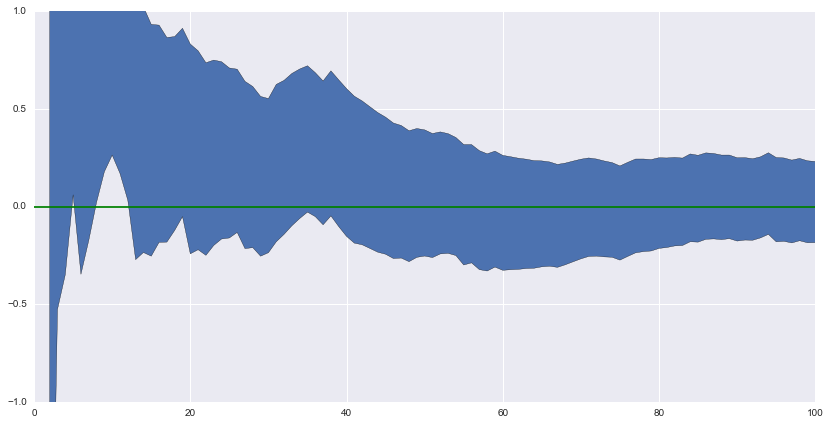

In [27]:
def estimations_с(X):
    m = X.cumsum() / n
    z = np.vectorize(lambda n: stats.t.ppf((1 + 0.95) / 2, n - 1))(n)
    sig_2 = ((X ** 2).cumsum() / n - m ** 2)
    return (m - z * (sig_2 / (n - 1)) ** 0.5, m + z * (sig_2 / (n - 1)) ** 0.5)

do_task(0, estimations_с)

d) https://ru.wikipedia.org/wiki/%D0%94%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB_%D0%B4%D0%BB%D1%8F_%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D0%B8_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8

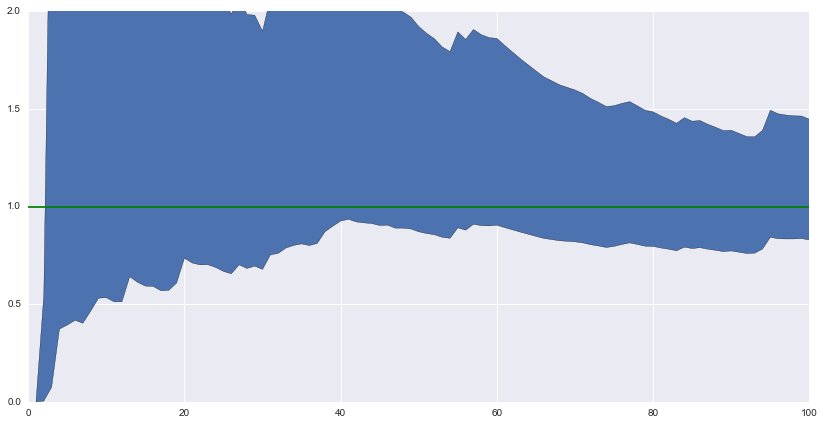

In [29]:
def estimations_d(X):
    sig_2 = ((X ** 2).cumsum() / n - X.cumsum() / n ** 2)
    return ((n - 1) * sig_2 / np.vectorize(lambda x: stats.chi2.ppf((1 - 0.95) / 2, x))(n),
            (n - 1) * sig_2 / np.vectorize(lambda x: stats.chi2.ppf((1 + 0.95) / 2, x))(n))
do_task(1,estimations_d)

### Вывод. Истинное значение почти всегда входит в доверительный интервал. Ширина доверительных интервалов для одного параметра, почти не изменяется от знаний второго параметра.